In [491]:
# Group 29 | Assignment 9 | Image Reconstruction
# Author: Yash Kumar Sahu | Roll No: CED19I039 
#         Radhika Mittal  |          CED19I050
#         Deep Patel      |          ME21D0004

## Question

Create a concentric square image, with inner square pixel intensity values as 125 and outer square as 0 everywhere. Find the projection along the row, column, diagonal with 45 degree and 135 degree. Reconstruct the image by applying back projection algorithm using the following ways
1. the row projection only 
2. the row and column projections 
3. the row and column and diagonal 45 degree projections 
4. the row and column and diagonal 45 and 135 degree projections 

## Libraries

In [5]:
from matplotlib import pyplot as plt                                              
import cv2
import glob
import os
import numpy as np
import ntpath
import math
import cmath
from scipy.fftpack import fftn, ifftn, fftshift

# Create concentric square image

In [34]:
img_2d=[[125]*10]*10
cc_sq_img=h=np.pad(img_2d,(10,10),'constant',constant_values=(0))



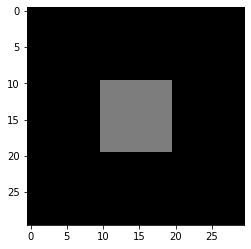

In [35]:
plt.imshow(cc_sq_img, cmap='gray', vmin = 0, vmax = 255)

## References

Gonzalez, Rafael C. and Woods, Richard E.. Digital image processing. Upper Saddle River, N.J.: Prentice Hall, 2008